In [23]:
import os
os.listdir()

['.Rhistory',
 'home credit  default risk-product-5.ipynb',
 'Music',
 'instacart.ipynb',
 '.condarc',
 'products.csv',
 'application_test.csv',
 'Untitled1.ipynb',
 'orders.csv',
 '.DS_Store',
 'VirtualBox VMs',
 '.CFUserTextEncoding',
 '要记的东西.ipynb',
 'Home Credit Visualization.ipynb',
 '.subversion',
 'Untitled.ipynb',
 'training_data.csv',
 'Case Comp Data Final.csv',
 'KPMG.ipynb',
 'realEmtHashed.csv',
 'instacart2.ipynb',
 '市值关系预测数据.xlsx',
 'Creative Cloud Files',
 'Pictures',
 'order_products__train.csv',
 'departments.csv',
 'Shirley, anomaly detection.ipynb',
 'woe_transform_function short version.ipynb',
 '.ipython',
 'Desktop',
 'Library',
 '.matplotlib',
 'AML-3 (3).ipynb',
 'application_train.csv',
 'coursera week3 assignment.ipynb',
 "AML_TOm's edition.ipynb",
 'home credit risk default_dev.ipynb',
 '.bash_sessions',
 'gcc-4.2',
 'coursera capstone.ipynb',
 'PycharmProjects',
 'Public',
 'aisles.csv',
 '.idlerc',
 'home credit  default risk-product.ipynb',
 '.RData',
 '.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.stats import pearsonr

In [124]:
data=pd.read_excel('market capitalization prediction data.xlsx')

## Business Objective: Predict Market Capitalization using existing features

### 1. Exploratory Analysis

In [125]:
data.head()

,PE(TTM),Market Capitalization,Research Staff %,Total Research Cost,Research Cost %,Revenue,Net Profit,PS(TTM),Total Amount of Research Staff
0,-40.7803,243.0236,33.94,6.3651,40.00,0.0070,-5.9593,34717.6484,243
1,-41.8218,350.0970,75.43,5.1618,40.00,0.0186,-8.4020,18827.1445,657
2,-153.8744,992.1979,29.20,9.4610,40.00,7.7509,-7.4773,148.3810,415
3,894.3462,273.8800,23.77,0.7824,45.02,2.0247,0.3062,135.2677,106
4,183.9299,137.2270,14.06,1.9250,44.16,4.0668,0.7461,33.7431,72


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 9 columns):
PE(TTM)
                          305 non-null float64
Market Capitalization             305 non-null float64
Research Staff %                  305 non-null float64
Total Research Cost               305 non-null float64
Research Cost %                   305 non-null float64
Revenue                           305 non-null float64
Net Profit                        305 non-null float64
PS(TTM)
                          305 non-null float64
Total Amount of Research Staff    305 non-null int64
dtypes: float64(8), int64(1)
memory usage: 21.5 KB


In [127]:
data.shape

(305, 9)

### We 've already handled missing values & outliers in Excel, so there's nothing to do for this part

#### Calculate Pearson's correlation between each variable

* Pearson's Correlation is to measure the linear correlation between 2 variables. 
* a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. 
* A value of 0 means no correlation. 
* The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.


### Correlation Matrix

In [128]:
data.corr(method='pearson')

,PE(TTM),Market Capitalization,Research Staff %,Total Research Cost,Research Cost %,Revenue,Net Profit,PS(TTM),Total Amount of Research Staff
PE(TTM)\n,1.000000,0.058165,-0.095077,-0.008893,-0.040990,-0.004562,0.033139,-0.014827,-0.000072
Market Capitalization,0.058165,1.000000,0.095508,0.638570,0.089963,0.417033,0.683578,0.006210,0.445022
Research Staff %,-0.095077,0.095508,1.000000,-0.000352,0.476291,-0.180445,-0.072724,0.256355,0.410934
Total Research Cost,-0.008893,0.638570,-0.000352,1.000000,0.205329,0.572733,0.617865,0.079675,0.331104
Research Cost %,-0.040990,0.089963,0.476291,0.205329,1.000000,-0.166685,-0.110121,0.398491,-0.022627
Revenue,-0.004562,0.417033,-0.180445,0.572733,-0.166685,1.000000,0.677134,-0.056482,0.291778
Net Profit,0.033139,0.683578,-0.072724,0.617865,-0.110121,0.677134,1.000000,-0.106938,0.304359
PS(TTM)\n,-0.014827,0.006210,0.256355,0.079675,0.398491,-0.056482,-0.106938,1.000000,-0.011663
Total Amount of Research Staff,-0.000072,0.445022,0.410934,0.331104,-0.022627,0.291778,0.304359,-0.011663,1.000000


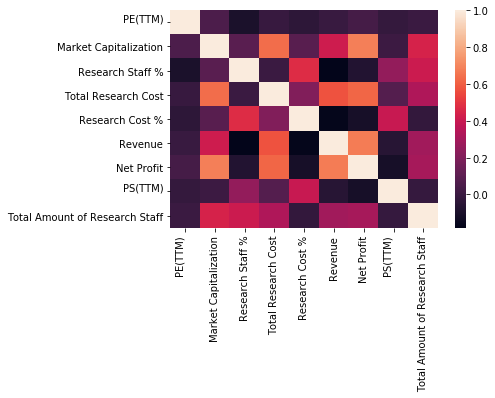

In [129]:
import seaborn as sns
sns.heatmap(data.corr(method='pearson'))

### As we can see, 'PE(TTM)\n', 'PS(TTM)','Research Staff %','Research Cost %' have low correlation with Y (market capitalization), so we drop them 

### 2. Data Preproessing

### Standard Scaling

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [133]:
from sklearn.metrics import r2_score,mean_squared_error

### Train & Test split

In [134]:
X=data.drop(['PE(TTM)\n','Market Capitalization','Research Staff %','Research Cost %','PS(TTM)\n'],axis=1).values
y=data['Market Capitalization'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### 3. Modelling

### 3.1. Linear Regression

In [167]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)
y_pred_linear=linear.predict(X_test)
mse_linear=mean_squared_error(y_test,y_pred_linear)
r2_score_linear=r2_score(y_test,y_pred_linear)
print('MSE for Linear Regression: ',mse_linear)
print('R squared for Linear Regression: ',r2_score_linear)

MSE for Linear Regression:  94691.31124921898
R squared for Linear Regression:  0.7016240376273373


In [115]:
names=['Total Research Cost','Revenue','Net Profit','Total Amount of Research Staff']
def pretty_print_linear(coefs, names=None, sort=False):
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key=lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                      for coef, name in lst)
print("Linear Regression model:", pretty_print_linear(linear.coef_,names=names))

Linear Regression model: 28.257 * Total Research Cost + -1.283 * Revenue + 33.601 * Net Profit + 0.108 * Total Amount of Research Staff


### 3.2. Lasso Regression

In [157]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
params={'alpha':[1e-11,1e-7,1e-3,0.01,0.1,1]}

In [159]:
lasso=Lasso()
grid=GridSearchCV(estimator=lasso,param_grid=params,scoring ='r2')
result=grid.fit(X_train,y_train)
print(result.best_params_)



{'alpha': 1e-11}


/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6525718.23328304, tolerance: 4664.92574450513
  positive)


In [166]:
model_lasso=Lasso(alpha=1e-11)
model_lasso.fit(X_train,y_train)
y_pred_lasso=model_lasso.predict(X_test)
mse_lasso=mean_squared_error(y_test,y_pred_lasso)
r2_lasso=r2_score(y_test,y_pred_lasso)
print('MSE for Lasso: ',mse_lasso)
print('R square for Lasso: ',r2_lasso)

MSE for Lasso:  94691.31124922074
R square for Lasso:  0.7016240376273317


/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6525718.23328304, tolerance: 4664.92574450513
  positive)


In [161]:
print("Lasso model:", pretty_print_linear(model_lasso.coef_,names=names))

Lasso model: 28.257 * Total Research Cost + -1.283 * Revenue + 33.601 * Net Profit + 0.108 * Total Amount of Research Staff


* For Lasso Regression, it adds a regularization term which prevents overfit and removes features that are less important. So it always performs better than linear Regression
* Our output of Linear Regression & Lasso Regression are the same, which means Linear Regression is already the optimal model for this case.